# Practical 7: Data Processing and Visualisation in Python Pt I


For the final two practicals this term, we're going to be spending some more time looking at how to process, visualise and analyse some more complex data.

Throughout these practicals, you should keep Alex's lecture on creating good figures in the back of your mind at all times. You should be aiming to produce **publication quality** figures at all stages - particularly in the policy paper!

In this practical, we'll look at some useful tools in pandas that allow you to:
1. manipulating data and calculating statistics to identify trends in complex datasets
2. combine and compare datasets

The dataset we will be working on in this practical contains daily averaged atmospheric chemistry data collected from Cardiff Castle since the year 2000. You can find the first part of this dataset containing NO2 concentrations here: `https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_NO2.csv`.

Begin by importing the dataset into a `pandas.DataFrame`.

In [ ]:
data_url = 'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_NO2.csv'

In [ ]:
# do it here
import pandas as pd
import numpy as np

data=pd.read_csv('https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_NO2.csv',skiprows=10)
data.head()


,Date,Nitrogen dioxide,Status
0,2000-10-01,23,V ugm-3
1,2000-10-02,26,V ugm-3
2,2000-10-03,20,V ugm-3
3,2000-10-04,33,V ugm-3
4,2000-10-05,31,V ugm-3


Before you can start working with a new dataset, you must first check that the data has imported correctly. The simplest way to do this is to make sure that the data in the columns are all assigned to the correct `type`.

## Type Wrangling

If you look at the data, it's obvious (to us) that some columns contain numbers, some contain dates and others contain text. A lot of the time, `pandas` will also recognise this automatically because it has a number of routines are applied during import to try and infer the correct `type` for each column, but these routines are not perfect. For example, dates can be in all sorts of different formats, and it's not always possible to unambiguously identify a column as containing dates. Or a column of numbers might contain a special character to identify missing data, or the person who entered the data might have made a typo and included a non-numeric character (this is irritatingly common!). If `pandas` isn't sure what `type` of data is in a column, it will treat that column as text.

> **The first thing you should do when importing a new dataset is check that `pandas` has interpreted all the data properly.** The *most* common cause of errors when working with data is that `pandas` has misinterpreted the `type` of a column (e.g. how do you plot a column of text data?!). Checking this at the start will save a lot of pain later!

You can check the `type` of each column by looking at the `dtypes` attribute of a `DataFrame` (e.g. `dat.dtypes`, where `dat` is the name of your dataframe). Do this in the cell below.



In [ ]:
# do it here
data.dtypes

,0
Date,object
Nitrogen dioxide,object
Status,object


You should see by looking at `dtypes` that pandas has interpreted all of the columns as `object`... what does this mean?

There are seven data types in Pandas:

| `type`           | Meaning                                        |
|:-----------------|:-----------------------------------------------|
| `object`           | text, or data that does not fit into the other categories |
| `int64`            | Integer numbers                                |
| `float64`          | Floating point numbers (decimals)              |
| `bool`             | True/False values                              |
| `datetime64[ns]`   | Date and Time values                           |
| `timedelta[ns]`    | Difference between two datetimes               |
| `category`         | Finite list of text values                     |

This means that `pandas` has done a very bad job of interpreting the data types in our dataset! But what would we expect the `type`s to be? By looking at the data, you can see that we would expect to see:

```
Date                datetime64[ns]
Nitrogen dioxide    float64
Status              object
dtype: object
```

To get the data to this point, we need to do two things:

1. Convert the `Nitrogen dioxide` column to `float64`
2. Convert the `Date` columns into `datetime[64]`.

### 1. Text to Numeric data

To convert a column from text to numeric data you can use the `pd.to_numeric` function. Try applying this function to the `Nitrogen dioxide` column in the cell below.

In [ ]:
# do it here
data['Nitrogen dioxide']=pd.to_numeric(data['Nitrogen dioxide'])

ValueError: Unable to parse string "No data" at position 156

Unless you did a *really* good job of reading and understanding the documentation for this function, you probably got an error here, the last line of which reads `ValueError: Unable to parse string "No data" at position 156`.

This is useful - it's telling us that `position 156` in the dataframe contains a `string` (some text) reading "No Data", which `pandas` can't convert to a number.

The `to_numeric` function has a way to handle this, which you can control by setting the `errors` argument of the function. Take a look at the documentation for this function, choose an appropriate value for the `errors` argument and try again in the cell below.

Remember to save your new numeric values in the dataframe, for example by overwriting the original values in the `Nitrogen dioxide` column.

In [ ]:
# do it here
data['Nitrogen dioxide']=pd.to_numeric(data['Nitrogen dioxide'],errors='coerce')
data.head()

,Date,Nitrogen dioxide,Status
0,2000-10-01,23.0,V ugm-3
1,2000-10-02,26.0,V ugm-3
2,2000-10-03,20.0,V ugm-3
3,2000-10-04,33.0,V ugm-3
4,2000-10-05,31.0,V ugm-3


### 2. Text to DateTime

Next, we need to convert the `Date` column into a useful format. Unfortunately, working with dates and times is a bit of a pain because of the number of different ways they can be represented... but there are a number of useful tools in `pandas` that help make it easier. We'll be using one function here:

 - `pd.to_datetime` is used to convert text to 'datetime' data which, by default, contains both date and time information. Here, we'll use it to convert the 'Date' column. This will contain the date the data was collected but, because this column contains no time information, the time will be set to midnight.

> **In case you're interested...** the reason that dates can be a bit tricky on computers is that, to deal with the multiple ways that dates and times can be represented, most computers record time as the [seconds elapsed since 1st January 1970](https://en.wikipedia.org/wiki/Unix_time). This is then converted into any arbitary format that you like when you need to look at it or interact with it. Everything we're doing here just tells `pandas` how to convert the text in the `Date` column into this format.

Have a go at this in the cell below. You'll need to convert the `Date` column using `to_datetime`, and save the resulting data in the `Date` column.

> **Hint**: You'll need to pay careful attention to the `format` argument of the `to_datetime` function, which you'll use to tell the function how to interpret the dates in your data. You'll need to construct a string describing the format that the dates are stored in - for example, `Jan 12 2024` would be represented by `'%b %d %Y'`. You can find a list of the different codes used to represent common date notations [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [ ]:
# do it here
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

### Final `type` checks...

Once you've done all this, check the `dtypes` again to make sure everything has worked. If it has, you should see:

```
Date                datetime64[ns]
Nitrogen dioxide           float64
Status                      object
dtype: object
```

In [ ]:
# do it here
data.dtypes

,0
Date,datetime64[ns]
Nitrogen dioxide,float64
Status,object



The process above may seem tedious, but it's the unfortunate reality of (environmental) data science: there are no uniform standards for data formatting and storage, which means that they rarely import perfectly the first time around. Whenever you go to work with a new dataset, you will almost certainly need to do a certain amount of data 'cleaning' to get it into a state that your computer can work with.

Now the data are in a sensible format, it's time for some...

# Plotting

The data we're working with here are a 'time series' - repeating measurements of a variable over time. This is a very common type of data in environmental science.

The first thing you should be thinking about with this type of data (or any type of data, actually) is creating a few initial plots to get a feel for what the data look like, and whether there are any obvious trends or patterns. This will shape your exploration and representation of the data.

Create a plot with time on the x-axis and `Nitrogen dioxide` on the y-axis

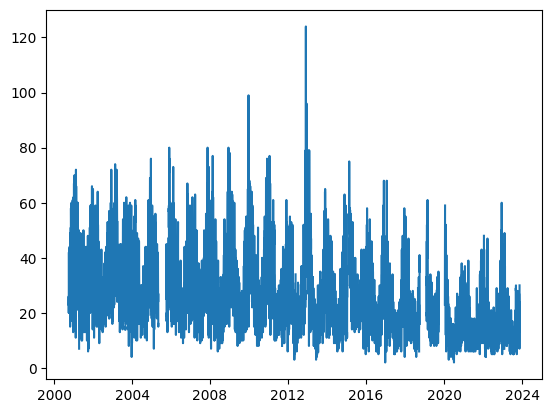

In [ ]:
# do it here
import matplotlib.pyplot as plt
plt.plot(data['Date'],data['Nitrogen dioxide'])
plt.show()

The first thing you should notice here is that there are a *lot* of data. What do you observe in this data? Are there any patterns? Are there any outliers? Are there any obvious trends?

Another thing it's often useful to do here is to look at the *distribution* of the data. This is particularly useful for identifying outliers, and for identifying whether the data are normally distributed (which is a common assumption in many statistical tests).

Create a histogram of the data with 30 bins in the cell below. You can find the documentation for the `hist` function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

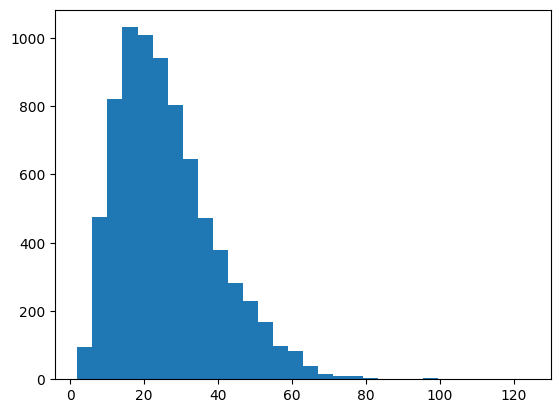

In [ ]:
# do it here
plt.hist(data['Nitrogen dioxide'],bins=30)
plt.show()

Now you've had a good look at the data, write down 5 observations about the data in the cell below.

In [ ]:
# do it here
# 1.
# 2.
# 3.
# 4.
# 5.

In [ ]:
# 1. The range of the data is 0-120 ug m-3
# 2. Most of the data falls between ~10-50 ug m-3
# 3. There is a lot of high-frequency variability in the data (NB NOT NOISE)
# 4. In general, NO2 concentrations seems to be higher in earler years and lower in later years?
# 5. There appears to be some ~annual variability in the data?
# 6. There are some missing data in 2005, 2019 and 2020
# ... etc

## 1. Tools: Extracting Meaning from Data

`pandas` has two useful tools that we will use to examine the patterns in this data, which are available as `DataFrame` `methods`:

 - `.rolling` is used to calculate statistics in a moving 'window'. For example, you could calculate the mean value of a variable in a 30-day period, then move the start time of that period forward by one step and calculate a new average. This returns a new dataframe where each row contains the statistics for 30 days of data, thus 'smoothing' the data.
 - `.groupby` is used to split up the data into 'groups' according to the values of a specified column, and then calculate the statistics for each 'group' within the data. For example, you could calculate the mean of the data in each month, which is similar to calculating a 30-day mean with `rolling`.

### Rolling Statistics

We'll start with an example to calculate a 30-day rolling mean on the data. You can do this by running:

```python
rm30 = your_dataframe_name[['Date', 'Nitrogen Dioxide']].rolling(window='30D', on='Date').mean()
#      ^                   ^                             ^       ^             ^          ^
#      1                   2                             3       4             5          6
```

Let's explain what's going on here:

1. is the name of your dataframe
2. selects the `Date` and `Nitrogen Dioxide` columns from your dataframe - we don't want to calculate rolling statistics for the `Status` column.
3. `.rolling` is the method we're using to calculate the rolling statistics
4. `window='30D'` tells `pandas` to calculate the rolling statistics over a 30-day window. You can change this to any number of days you like.
5. `on='Date'` tells `pandas` which column to use as the 'time' column. If you don't specify this, `pandas` will assume that you want to use the index of the dataframe as the time column.
6. `.mean()` tells `pandas` to calculate the mean of the data in each window. You can change this to any other statistic you like, or even use the `.aggregate()` method to calculate multiple statistics at once.

Try this in the cell below, then create a **publication quality** plot containing both the original raw data in blue, and the new rolling mean in red.

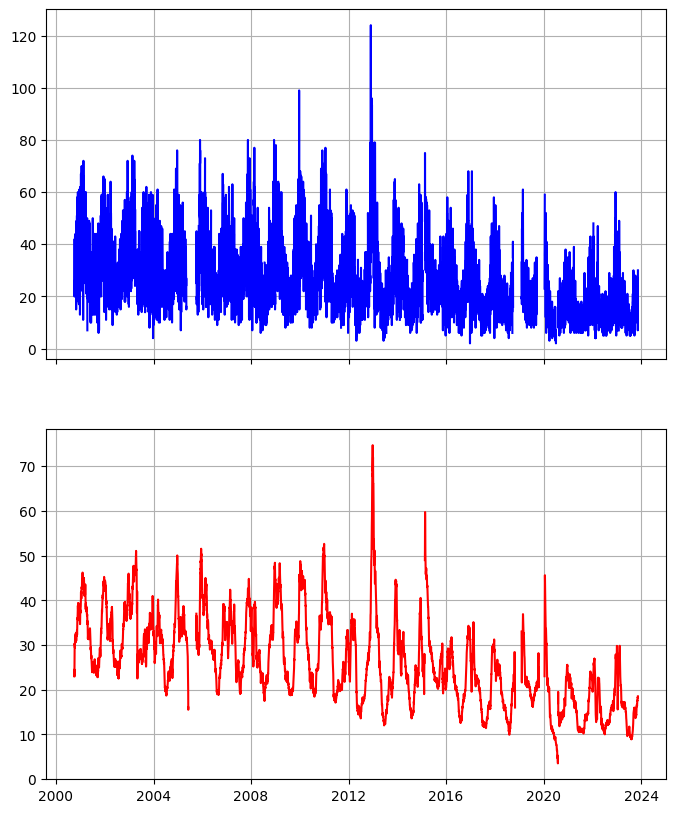

In [ ]:
# do it here
rm_30 = data[['Date', 'Nitrogen dioxide']].rolling(window='30D', on='Date').mean()

rm_30.head()
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
ax0, ax1 = axs
ax0.grid(True)
ax1.grid(True)

ax0.plot(data['Date'],data['Nitrogen dioxide'],color='blue')


ax1.plot(rm_30['Date'],rm_30['Nitrogen dioxide'],color='red')
plt.show()





### Grouped Statistics

Next, we'll try calculating the mean of the data in each month of the year. You can do this by running:

```python
monthly = your_dataframe_name[['Date', 'Nitrogen Dioxide']].groupby(your_dataframe_name.Date.dt.month).mean()
#                                                           ^       ^                   ^    ^  ^      ^
#                                                           1       2                   3    4  5      6
```

Let's explain what's new here:

1. `.groupby` is the method we're using to calculate the rolling statistics
2. The first argument to `groupby` identifies the characteristic that you want to group the data by. This can either be a column name, or an array of values the same length as your dataframe. `groupby` will identify unique values in this column/array, and use these unique values to group the data. In this case, we're going to identify the month of the year that each data point was collected in.
3. Select the column of data that contains the date values
4. `.dt` accesses a variety of methods that are specific to `datetime` data
5. `.month` returns a numeric value representing the month that each data point was collected in (from 1-12).
6. `.mean()` tells `pandas` to calculate the mean of the data in each group. You can change this to any other statistic you like, or even use the `.aggregate()` method to calculate multiple statistics at once.

Try this in the cell below, and plot this on top of your **publication quality** graph from above.

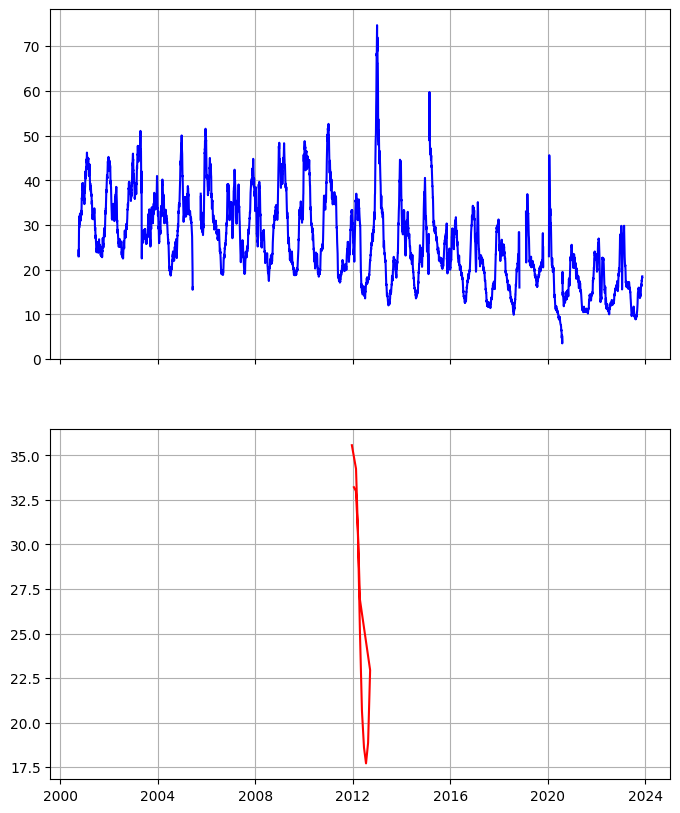

In [ ]:
# do it here
monthly = data[['Date', 'Nitrogen dioxide']].groupby(data.Date.dt.month).mean()
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
ax0, ax1 = axs
ax0.grid(True)
ax1.grid(True)

ax0.plot(rm_30['Date'],rm_30['Nitrogen dioxide'],color='blue')


ax1.plot(monthly['Date'],monthly['Nitrogen dioxide'],color='red')
plt.show()

You should find that the results of `groupby` look very off on this plot... you should see a single new line centered around 2012 in the plot, rather than a long-term rolling average, like you got for `rolling`. This illustrated the difference between `rolling` and `groupby` nicely...

To understand this difference, take a look at the contents of both the `rm_30` and `monthly` dataframes in the cells below:

In [ ]:
# do it here
rm_30.head()


,Date,Nitrogen dioxide
0,2000-10-01,23.0
1,2000-10-02,24.5
2,2000-10-03,23.0
3,2000-10-04,25.5
4,2000-10-05,26.6


In [ ]:
# and here
monthly.head()

,Date,Nitrogen dioxide
Date,,
1,2012-01-16 09:23:28.695652096,33.211632
2,2012-02-15 00:00:00.000000000,32.994915
3,2012-03-15 14:36:31.304347904,30.719884
4,2012-04-15 02:36:31.304347904,25.162717
5,2012-05-15 14:36:31.304347904,20.669656


You should notice here that `rm_30` has 8446 rows (the same number of rows as the original data), while `monthly` only has 12 rows, one for each month.

`rolling` calculates the average of the data within a specified time window and yields a new value for each data point. `groupby` calculates the mean of all the data collected in a single month, and yields a new value for each month. The value that `groupby` returns for January (month `1`) is an average of all data collected in January for *all* years of the dataset.

Try plotting the data from the `monthly` dataset in a separate plot below. Note that the 'month' values are in the `index` of the dataframe, not in the `Date` column, so you should use the `index` for the x-axis of your plot.

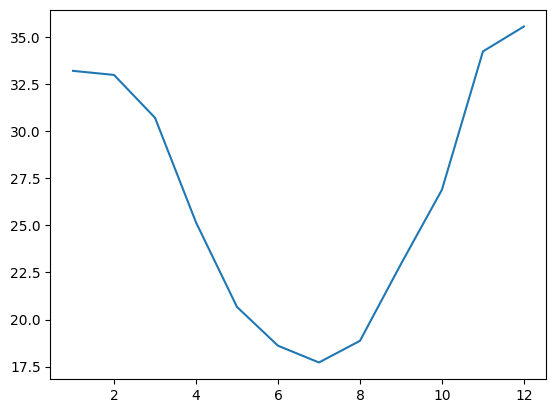

In [ ]:
# do it here
plt.plot(monthly.index,monthly['Nitrogen dioxide'])
plt.show()

Hopefully you see a sensible-looking pattern in this plot, showing a clear seasonal cycle with a NO2 minimum in the summer months, and a maximum in the winter months.

The `rolling` and `groupby` methods are both useful for dealing with time-series (and other!) data, but they are very different. Come up with three questions you might be able to answer with each tool in the cell below:

In [ ]:
# rolling
# 1. what is the trend in NO2 concentrations? rolling will show whether NO2 has been increasing or decreasing over a period of years
# 2.
# 3.

# groupby
# 1. Does NO2 conc depend on season? groupby shows variation across a single year averaged over many years
# 2.
# 3.

### Uncertainties

For the next part of this practical, we're going to have a think about how to represent uncertainties associated with the manipulations we're applying to the data. For example, if you compare the raw data to the `rm_30` smooth above, you can see that there is a lot of variability around the `rm_30` line. Plotting the `rm_30` line alone would not give a reader an idea of how well that line represents the underlying data. Representing uncertainty in plots is an *essential* skill that is vital to data visualisation.

The best way to represent this uncertainty is to include an **error envelope** around your smoothed line. This is a shaded area that represents the range of values that the smoothed line could take, given the variability in the data. This is a very common way to represent uncertainty in time-series data.

The first thing to do is to calculate the variation associated with the calculated mean. You can do this swapping the `mean()` statement at the end of the `rolling` and `groupby` statements for `std()`, which calculates the standard deviation of the data in each window/group.

Calculate the standard deviation for a 30-day rolling window and save it in a new variable called `rm_30_std`:

In [ ]:
# do it here
rm_30_std = data[['Date', 'Nitrogen dioxide']].rolling(window='30D', on='Date').std()
rm_30_std.head()

,Date,Nitrogen dioxide
0,2000-10-01,NaN
1,2000-10-02,2.121320
2,2000-10-03,3.000000
3,2000-10-04,5.567764
4,2000-10-05,5.412947


Now you've calculated the uncertainties, create a plot of the `rm_30` data with a shaded error envelope. You can do this using the `fill_between` function, which takes the x-axis values, the mean values and the standard deviation values as arguments. You can find the documentation for this function [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html).

> **Hint** you might want to specify the `alpha` argument in `fill_between`, which sets the opacity (transparency) of the shaded region

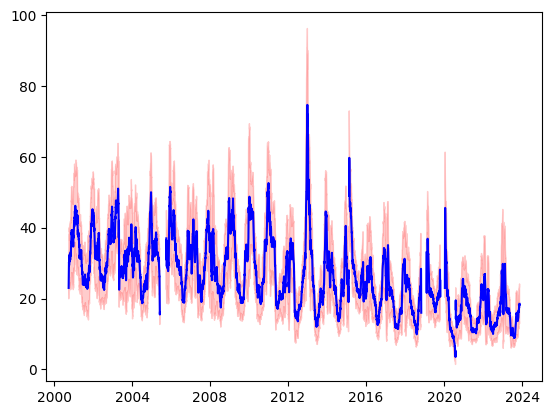

In [ ]:
# do it here
import matplotlib.pyplot as plt
plt.plot(rm_30['Date'],rm_30['Nitrogen dioxide'],color='blue')
plt.plot(rm_30_std['Date'],(rm_30_std['Nitrogen dioxide']+rm_30['Nitrogen dioxide']),color='red',alpha=0)
plt.plot(rm_30_std['Date'],(-rm_30_std['Nitrogen dioxide']+rm_30['Nitrogen dioxide']),color='red',alpha=0)
plt.fill_between(rm_30_std['Date'],(rm_30_std['Nitrogen dioxide']+rm_30['Nitrogen dioxide']),(-rm_30_std['Nitrogen dioxide']+rm_30['Nitrogen dioxide']),color='red',alpha=0.2)
plt.show()

You should now have a graph showing a monthly 30-day mean of the data with a shaded error envelope showing the standard deviation of the data around that mean.

At this stage, it's useful to stop and think what this 30-day mean is showing you. This represents an approximately monthly smoothing of the data... but would we expect systematic variability on that timescale? There is no *a priori* reason to think that air pollution cares about the calendar month, so why would we expect to see a monthly cycle in the data? It is reasonable to expect that pollutant concentration vary seasonally, so it might be more useful to consider seasonal cycles - or ~3 months, or 90 days - rather than monthly cycles if we want to look for this trend in the data.

Repeat the application of `rolling` above to create a 90-day rolling average and standard deviation of the dataset.

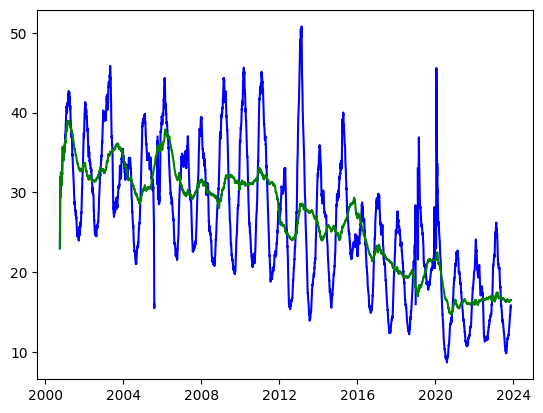

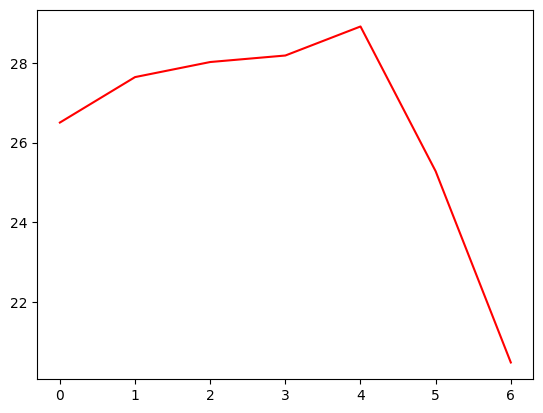

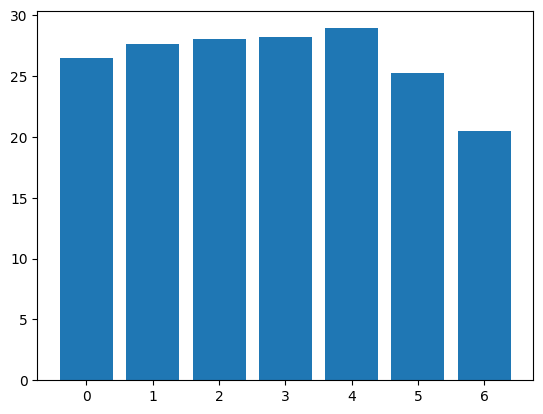

In [ ]:
# do it here
rm_90 = data[['Date', 'Nitrogen dioxide']].rolling(window='90D', on='Date').mean()
rm_90_std = data[['Date', 'Nitrogen dioxide']].rolling(window='90D', on='Date').std()

plt.plot(rm_90['Date'],rm_90['Nitrogen dioxide'],color='blue')

rm_1Y=data[['Date', 'Nitrogen dioxide']].rolling(window='365D', on='Date').mean()
rm_1Y_std=data[['Date', 'Nitrogen dioxide']].rolling(window='365D', on='Date').std()
plt.plot(rm_1Y['Date'],rm_1Y['Nitrogen dioxide'],color='green')
plt.show()

weekday=data[['Date', 'Nitrogen dioxide']].groupby(data.Date.dt.weekday).mean()
plt.plot(weekday.index,weekday['Nitrogen dioxide'],color='red')
plt.show()
plt.bar(weekday.index,weekday['Nitrogen dioxide'])
plt.show()

Does this do a better job of representing the underlying seasonal trend? This highlights the importance of carefully thinking about width of the smoothing window you're applying, and making sure it's appropriate to the scale of the patterns you're interested in identifying.

### Stretch Section

Now you've covered the basics of these tools, here are some other things you might like to try with this datset:

- What is the long-term trend in the data? Use `rolling` to calculate a multi-year rolling average of the data and plot this on a separate graph. What do you see?
- Have there been changes in seasonal variability with time? It's difficult to tell this while the data contains an underlying trend... subtract the long-term trend you calculated above from the raw data, and then calculate a seasonal or monthly rolling average of the data with time - do you see any change in the amplitude of the seasonal signal with time?
- How does the working week alter pollution patterns? Use `groupby` to calculate the average pollution levels on each day of the week. Are some days reliably worse than others? (How) does this change with time?

# 2. Combining Data

For the last part of this practical, we're going to show you how to bring in a second dataset, and merge it with an existing dataset. This is a very common task in data science, as it's rare for all the data you need to exist in a single source.

The second dataset contains particulate matter concentrations (PM10 and PM2.5) from the same sensor station in Cardiff over the same period. You can find this data at: `https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_NO2.csv`.

Import this data into a `pandas.DataFrame`, and make sure all the data have imported correctly.




In [ ]:
data_url_2 = 'https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_PM.csv'

In [ ]:
# do it here
data2=pd.read_csv('https://github.com/Quantitative-Environmental-Science/data/raw/main/data/M7_Cardiff_PM.csv',skiprows=10)
data2.head()

,Date,PM10 particulate matter (Hourly measured),Status,PM2.5 particulate matter (Hourly measured),Status.1
0,2000-10-01,19,V ugm-3 (INDIC.GRAV),No data,NaN
1,2000-10-02,27,V ugm-3 (INDIC.GRAV),No data,NaN
2,2000-10-03,28,V ugm-3 (INDIC.GRAV),No data,NaN
3,2000-10-04,30,V ugm-3 (INDIC.GRAV),No data,NaN
4,2000-10-05,18,V ugm-3 (INDIC.GRAV),No data,NaN


Now you have this data imported, you need to look at it. Create a figure with three panels with a shared x-axis. Plot Nitrogen dioxide, PM10 and PM2.5 as a function of time on each plot.

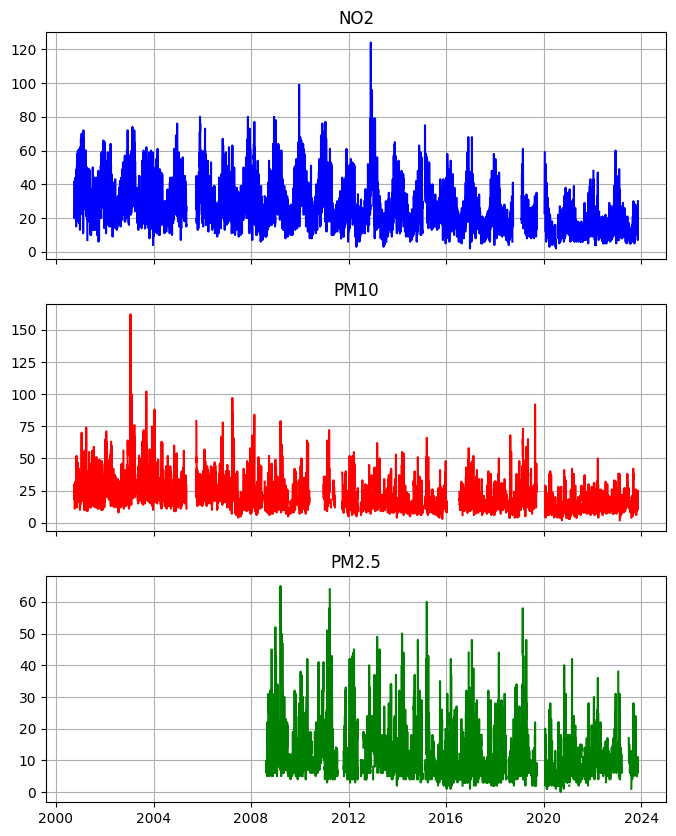

In [ ]:
# do it here
data2['Date']=pd.to_datetime(data2['Date'],format='%Y-%m-%d')
data2['PM10 particulate matter (Hourly measured)']=pd.to_numeric(data2['PM10 particulate matter (Hourly measured)'],errors='coerce')
data2['PM2.5 particulate matter (Hourly measured)']=pd.to_numeric(data2['PM2.5 particulate matter (Hourly measured)'],errors='coerce')

fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
ax0, ax1, ax2 = axs
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

ax0.plot(data['Date'],data['Nitrogen dioxide'],color='blue')
ax1.plot(data2['Date'],data2['PM10 particulate matter (Hourly measured)'],color='red')
ax2.plot(data2['Date'],data2['PM2.5 particulate matter (Hourly measured)'],color='green')
ax0.set_title('NO2')
ax1.set_title('PM10')
ax2.set_title('PM2.5')
plt.show()


Now, imagine you have been given the task of working out if there is a relationship between these data. Because the data contain a lot of high-frequency variability, it's difficult to do this by eye, so we should try to approach this statistically. To do this, we must first get all the data into a single dataframe by *merging* them together.

We do this using the `pd.merge` function, which takes two dataframes and combines them together based on the values in a common column. In this case, we want to merge the two dataframes based on the `Date` column, which is present in both dataframes and contains the date that each measurement was collected on.

Merge the dataframes containing the NO2 and PM data using the `Date` column in the cell below. Save the result as a new variable.

In [ ]:
# do it here
mdat=pd.merge(data,data2,on='Date')
mdat.head()

,Date,Nitrogen dioxide,Status_x,PM10 particulate matter (Hourly measured),Status_y,PM2.5 particulate matter (Hourly measured),Status.1
0,2000-10-01,23.0,V ugm-3,19.0,V ugm-3 (INDIC.GRAV),NaN,NaN
1,2000-10-02,26.0,V ugm-3,27.0,V ugm-3 (INDIC.GRAV),NaN,NaN
2,2000-10-03,20.0,V ugm-3,28.0,V ugm-3 (INDIC.GRAV),NaN,NaN
3,2000-10-04,33.0,V ugm-3,30.0,V ugm-3 (INDIC.GRAV),NaN,NaN
4,2000-10-05,31.0,V ugm-3,18.0,V ugm-3 (INDIC.GRAV),NaN,NaN


Now you have all this data in one place, you can start to look at the relationships between the different pollutants. One way to start doing this would be to plot the concentrations of each pollutant against the other pollutants in the dataset. This is known as a 'cross plot'.

Create a figure containing three scatter plots, plotting NO2 vs. PM10, NO2 vs. PM2.5 and PM10 vs. PM2.5. What do you see? Is there a relationship between the pollutants?

> **Hint**: you might want to use the `s` argument of the `scatter` function to reduce the size of the data points here, and possibly set the `alpha` value quite low to make the data points semi-transparent, which reduces the visibility of the outliers and allows trends to be seen more clearly.

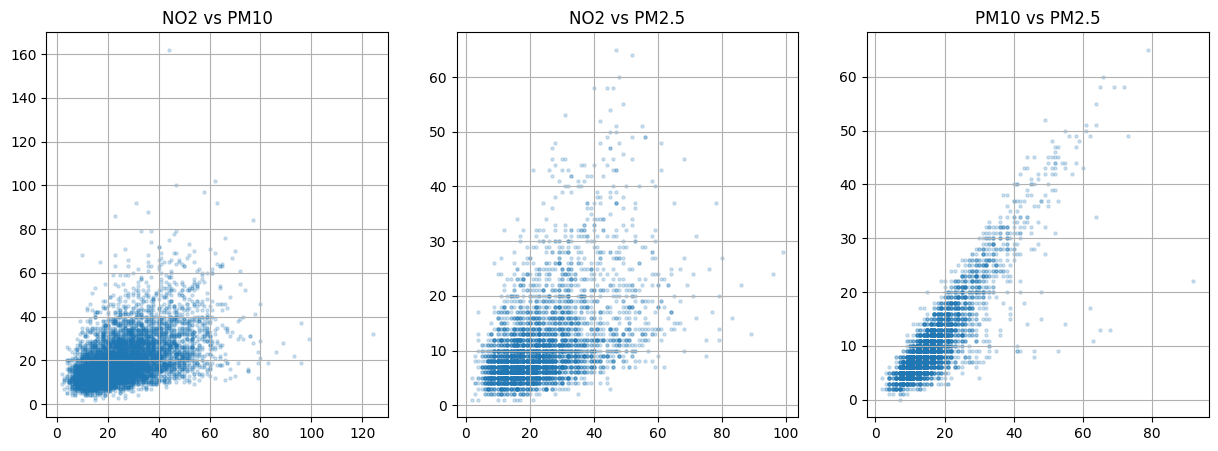

In [ ]:
# do it here
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax0, ax1, ax2 = axs
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

ax0.scatter(mdat['Nitrogen dioxide'],mdat['PM10 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax1.scatter(mdat['Nitrogen dioxide'],mdat['PM2.5 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax2.scatter(mdat['PM10 particulate matter (Hourly measured)'],mdat['PM2.5 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax0.set_title('NO2 vs PM10')
ax1.set_title('NO2 vs PM2.5')
ax2.set_title('PM10 vs PM2.5')

plt.show()

You should see here that the two particulate matter variables are well correlated, and that there is a *general* positive relationship between the NO2 and the PM variables. However, there is a lot of scatter in the data, and it's difficult to see if there is a clear relationship between NO2 and PM10/PM2.5.

To investigate this further, we must use a statistical test! We can use a correlation test to determine whether there is a statistically significant relationship between these variables.

### Correlation Testing

To test for a correlation, we're going to introduce a new package: `scipy`. This is `Sci`entific `Py`thon, and contains a lot of useful tools for working with data. We're going to use the `scipy.stats` module, which contains a lot of useful statistical tools, including `pearsonr`, which calculates the Pearson correlation coefficient and the associated p-value.

Run the code below to import the `stats` module from `scipy`:

In [ ]:
from scipy import stats

Next, use the `pearsonr` function of `stats` to calculate the correlation coefficient between each pair of variables in the dataset:

In [ ]:
# do it here
stats.pearsonr(mdat['Nitrogen dioxide'],mdat['PM10 particulate matter (Hourly measured)'])

ValueError: array must not contain infs or NaNs

Oh dear, an error... what does it say? At the end, you should see `ValueError: array must not contain infs or NaNs`. This is telling you that there are some missing values in the dataset, which `pearsonr` doesn't know how to deal with.

To calculate the correlation coefficient, we need to remove these missing values, but this isn't straightforward because, as you can see from the plot you made above, there are different amounts of missing data in each variable. To do this, we must identify only the rows in the dataframe where data are missing for the two variables of interest, and then remove them before calculating the correlation coefficient.

You can see an example of this for NO2 vs. PM10 in the cell below:

In [ ]:
# identify rows where NO2 and PM10 are both NaN
nans = mdat['Nitrogen dioxide'].isna() | mdat['PM10 particulate matter (Hourly measured)'].isna()
#                               ^      ^
#                               1      2

# 1. identify rows where NO2 is NaN
# 2. this "|" character stands for "or"
# together, this command says 'rows where (NO2 is NaN) OR (PM10 is NaN)'

# re-run pearsonr with these rows removed
r1 = stats.pearsonr(mdat.loc[~nans, 'Nitrogen dioxide'], mdat.loc[~nans, 'PM10 particulate matter (Hourly measured)'])
#                            ^
#                            this "~" character stands for "not" - so wherever NO2 and PM10 are not NaN

r1

PearsonRResult(statistic=0.47972152399259216, pvalue=0.0)

This produces a Pearson R value that represents the direction and strength of any correlation in your dataset (from -1 to +1), and a p value that represents the probability of observing that strength of relationship in a random dataset. The p value is a measure of the statistical significance of the correlation, and is usually considered significant if it is less than 0.05. In this case, it looks like there *is* a statistically significant relationship between NO2 and PM10!

Repeat this for the other two pairs of variables in the dataset. What do you find?

In [ ]:
# do it here
nans = mdat['Nitrogen dioxide'].isna() | mdat['PM2.5 particulate matter (Hourly measured)'].isna()
r2 = stats.pearsonr(mdat.loc[~nans, 'Nitrogen dioxide'], mdat.loc[~nans, 'PM2.5 particulate matter (Hourly measured)'])
print(r2)

nans= mdat['PM10 particulate matter (Hourly measured)'].isna() | mdat['PM2.5 particulate matter (Hourly measured)'].isna()
r3= stats.pearsonr(mdat.loc[~nans, 'PM10 particulate matter (Hourly measured)'], mdat.loc[~nans, 'PM2.5 particulate matter (Hourly measured)'])
print(r3)

PearsonRResult(statistic=0.48304754381554593, pvalue=1.1651827333649214e-256)
PearsonRResult(statistic=0.8716540390171416, pvalue=0.0)


## Bringing it all together

Finally, make a single, publication-quality figure showing the cross-plots of all three pollutants, with the Pearson R and p values written on each graph.

**Hint**: You might want to make use of 'f-strings' here, which allow you to insert variables into strings. For example, if `a = 5.237`, you could write `f'the value of a is {a:.2f}'`, which would return 'the value of a is 5.24' - it inserts the value of the variable and rounds the numbers! This will be useful for putting the Pearson R and p values on the plots.

Text(0.5, 1.0, 'PM10 vs PM2.5')

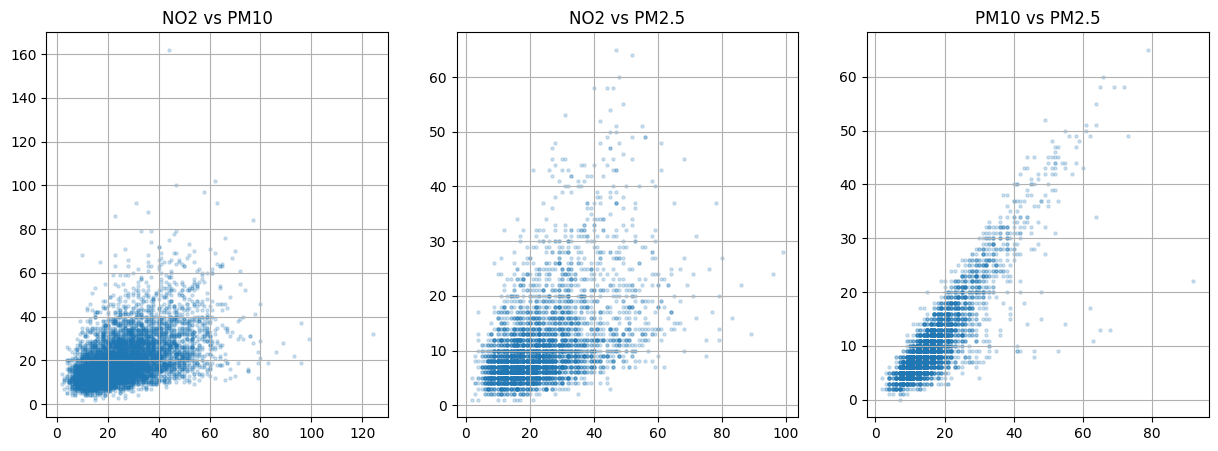

In [ ]:
# do it here
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
ax0, ax1, ax2 = axs
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)

ax0.scatter(mdat['Nitrogen dioxide'],mdat['PM10 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax1.scatter(mdat['Nitrogen dioxide'],mdat['PM2.5 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax2.scatter(mdat['PM10 particulate matter (Hourly measured)'],mdat['PM2.5 particulate matter (Hourly measured)'],s=5, alpha=0.2)
ax0.set_title('NO2 vs PM10')
ax1.set_title('NO2 vs PM2.5')
ax2.set_title('PM10 vs PM2.5')




